In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a=pd.read_csv("car24_final_dataset.csv",index_col=0)
a

,car_name,km_travelled,Fuel_type,Vehicle_type,Registration_Location,original_price,discounted_final_price,selling_Location,manufacturing_year,city,discount_percent
1,Mahindra Thar,37.97k,Petrol,Auto,GJ-03,9.8L,4.3L,"M3M Urbana, Golf Course Ext.",2021,Gurugram,56%
2,Hyundai Grand i10,37.70k,Petrol,Manual,GJ-03,3.28L,3.6L,Karnavati Club,2015,Ahmedabad,-9%
3,Renault Kwid,25.00k,Petrol,Manual,GJ-27,10.61L,9.7L,Naroda,2019,Ahmedabad,8%
4,Hyundai Grand i10,69.69k,Petrol,Manual,GJ-27,6.8L,3.66L,Karnavati Club,2017,Ahmedabad,46%
5,Maruti Wagon R 1.0,79.74k,Petrol,Manual,GJ-12,5.06L,2.43L,Karnavati Club,2018,Ahmedabad,51%
...,...,...,...,...,...,...,...,...,...,...,...
263,Tata Zest,61.66k,Petrol,Manual,MH-09,6.08L,2.03L,Tathawade,2016,Pune,66%
264,Tata Zest,61.92k,Petrol,Manual,MH-14,7.06L,4.51L,Tathawade,2014,Pune,36%
265,Maruti Baleno,13.52k,Petrol,Manual,MH-12,2.54L,3.42L,Tathawade,2024,Pune,-34%
266,Mahindra XEV 9e,9.79k,Electric,Auto,MH-12,2.23L,2.88L,Tathawade,2025,Pune,-29%


In [3]:
def convert_km(value):
    try:
        return float(value.replace('k', '')) * 1000
    except:
        return None  # or np.nan if you're using NumPy

a['km_travelled'] = a['km_travelled'].apply(convert_km)


In [4]:
def convert_price(val):
    try:
        val = str(val).lower().strip()
        if val.endswith('l'):  # Lakhs
            return int(float(val.replace('l', '')) * 100000)
        elif val.endswith('k'):  # Thousands
            return int(float(val.replace('k', '')) * 1000)
        else:
            return int(float(val))  # Plain numeric
    except:
        return None  # or np.nan

# Apply to both price columns
price_cols = ['original_price', 'discounted_final_price']
for col in price_cols:
    a[col] = a[col].apply(convert_price)


In [5]:
median_km = a['km_travelled'].median()
a['km_travelled'] = a['km_travelled'].fillna(median_km)


In [6]:
a['km_travelled'] = a['km_travelled'].astype(int)


In [7]:
df=a

In [21]:
df

,car_name,km_travelled,Fuel_type,Vehicle_type,Registration_Location,original_price,discounted_final_price,selling_Location,manufacturing_year,city,discount_percent,km_bin
1,Mahindra Thar,37970,Petrol,Auto,GJ-03,980000,430000,"M3M Urbana, Golf Course Ext.",2021,Gurugram,56%,30001-40000
2,Hyundai Grand i10,37700,Petrol,Manual,GJ-03,328000,360000,Karnavati Club,2015,Ahmedabad,-9%,30001-40000
3,Renault Kwid,25000,Petrol,Manual,GJ-27,1061000,969999,Naroda,2019,Ahmedabad,8%,20001-30000
4,Hyundai Grand i10,69690,Petrol,Manual,GJ-27,680000,366000,Karnavati Club,2017,Ahmedabad,46%,60001-70000
5,Maruti Wagon R 1.0,79740,Petrol,Manual,GJ-12,505999,243000,Karnavati Club,2018,Ahmedabad,51%,70001-80000
...,...,...,...,...,...,...,...,...,...,...,...,...
263,Tata Zest,61660,Petrol,Manual,MH-09,608000,202999,Tathawade,2016,Pune,66%,60001-70000
264,Tata Zest,61920,Petrol,Manual,MH-14,706000,451000,Tathawade,2014,Pune,36%,60001-70000
265,Maruti Baleno,13520,Petrol,Manual,MH-12,254000,342000,Tathawade,2024,Pune,-34%,10001-20000
266,Mahindra XEV 9e,9790,Electric,Auto,MH-12,223000,288000,Tathawade,2025,Pune,-29%,1000-10000


In [10]:
df.isnull().sum()

car_name                  0
km_travelled              0
Fuel_type                 0
Vehicle_type              0
Registration_Location     0
original_price            0
discounted_final_price    0
selling_Location          0
manufacturing_year        0
city                      0
discount_percent          0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.columns

Index(['car_name', 'km_travelled', 'Fuel_type', 'Vehicle_type',
       'Registration_Location', 'original_price', 'discounted_final_price',
       'selling_Location', 'manufacturing_year', 'city', 'discount_percent'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 267
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   car_name                252 non-null    object
 1   km_travelled            252 non-null    int64 
 2   Fuel_type               252 non-null    object
 3   Vehicle_type            252 non-null    object
 4   Registration_Location   252 non-null    object
 5   original_price          252 non-null    int64 
 6   discounted_final_price  252 non-null    int64 
 7   selling_Location        252 non-null    object
 8   manufacturing_year      252 non-null    int64 
 9   city                    252 non-null    object
 10  discount_percent        252 non-null    object
dtypes: int64(4), object(7)
memory usage: 23.6+ KB


In [14]:
df.describe()

,km_travelled,original_price,discounted_final_price,manufacturing_year
count,252.000000,2.520000e+02,2.520000e+02,252.000000
mean,54536.936508,6.344404e+05,5.083690e+05,2019.297619
std,21878.785142,3.937005e+05,3.142923e+05,2.697703
min,2360.000000,1.520000e+05,1.129990e+05,2012.000000
25%,38970.000000,3.810000e+05,3.330000e+05,2018.000000
50%,52815.000000,5.215000e+05,4.300000e+05,2019.000000
75%,71425.000000,7.860000e+05,6.200000e+05,2021.000000
max,99320.000000,3.824000e+06,3.350000e+06,2025.000000


In [15]:
df.describe(include="O")

,car_name,Fuel_type,Vehicle_type,Registration_Location,selling_Location,city,discount_percent
count,252,252,252,252,252,252,252
unique,76,5,2,94,28,21,141
top,Maruti Baleno,Petrol,Manual,UP-14,"M3M Urbana, Golf Course Ext.",Gurugram,46%
freq,22,202,202,19,49,60,5


In [25]:
df["car_name"].value_counts()

car_name
Maruti Baleno        22
Maruti Swift         20
Hyundai Grand i10    11
Honda Amaze          10
Renault Kwid          9
                     ..
Maruti Ciaz           1
Maruti S PRESSO       1
Tata Safari           1
Skoda SLAVIA          1
Mahindra XEV 9e       1
Name: count, Length: 76, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_22148\2503669958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="viridis")


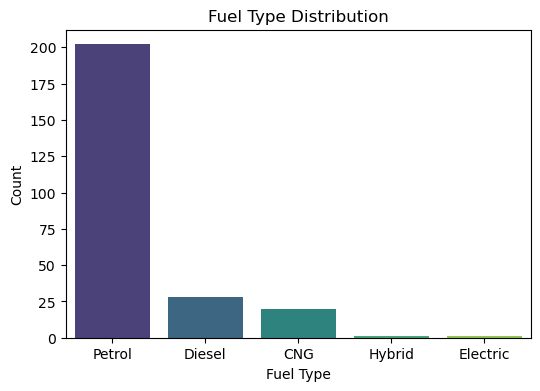

In [29]:
fuel_counts = df["Fuel_type"].value_counts()


# --- Fuel_type Bar Plot ---
plt.figure(figsize=(6,4))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="viridis")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

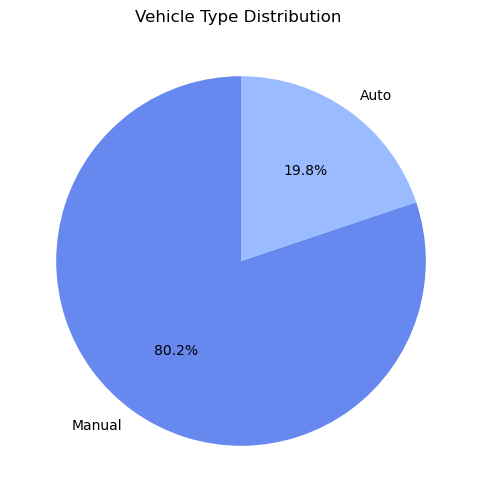

In [30]:
vehicle_counts = df["Vehicle_type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(vehicle_counts.values, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm"))
plt.title("Vehicle Type Distribution ")
plt.show()

In [17]:
max_km = df['km_travelled'].max()
min_km = df['km_travelled'].min()

print("Maximum km_travelled:", max_km)
print("Minimum km_travelled:", min_km)

import pandas as pd

# Define bins
bins = [1000, 10000, 20000, 30000, 40000, 50000, 
        60000, 70000, 80000, 90000, 100000]

# Define labels for each bin
labels = [
    "1000-10000", "10001-20000", "20001-30000", "30001-40000",
    "40001-50000", "50001-60000", "60001-70000", "70001-80000",
    "80001-90000", "90001-100000"
]

# Create a new column with binned values
a['km_bin'] = pd.cut(a['km_travelled'], bins=bins, labels=labels, include_lowest=True)

# Check distribution
print(a['km_bin'].value_counts())




Maximum km_travelled: 99320
Minimum km_travelled: 2360
km_bin
50001-60000     58
30001-40000     40
40001-50000     34
80001-90000     25
70001-80000     24
60001-70000     24
20001-30000     18
90001-100000    16
10001-20000      9
1000-10000       4
Name: count, dtype: int64


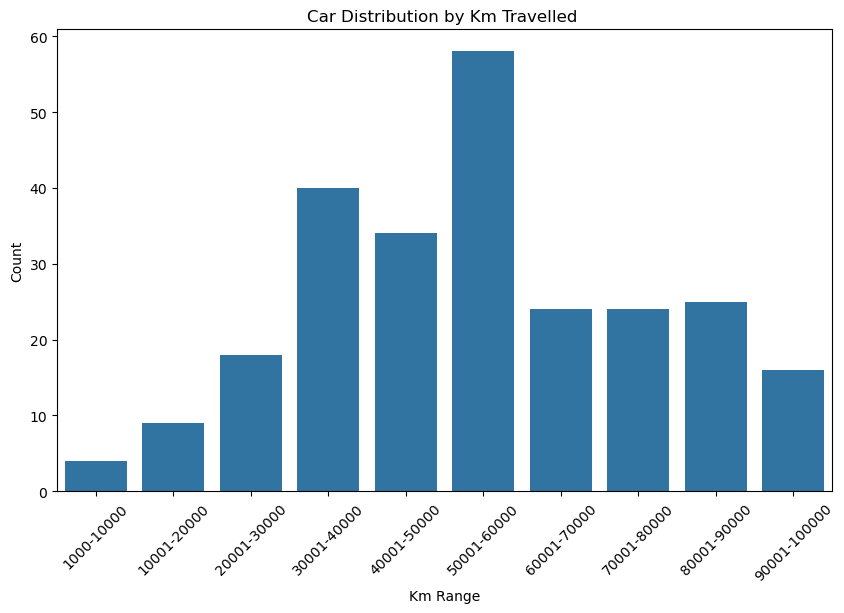

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns



# Countplot for the binned column
plt.figure(figsize=(10,6))
sns.countplot(x='km_bin', data=a, order=labels)
plt.title("Car Distribution by Km Travelled ")
plt.xlabel("Km Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [31]:
df

,car_name,km_travelled,Fuel_type,Vehicle_type,Registration_Location,original_price,discounted_final_price,selling_Location,manufacturing_year,city,discount_percent,km_bin
1,Mahindra Thar,37970,Petrol,Auto,GJ-03,980000,430000,"M3M Urbana, Golf Course Ext.",2021,Gurugram,56%,30001-40000
2,Hyundai Grand i10,37700,Petrol,Manual,GJ-03,328000,360000,Karnavati Club,2015,Ahmedabad,-9%,30001-40000
3,Renault Kwid,25000,Petrol,Manual,GJ-27,1061000,969999,Naroda,2019,Ahmedabad,8%,20001-30000
4,Hyundai Grand i10,69690,Petrol,Manual,GJ-27,680000,366000,Karnavati Club,2017,Ahmedabad,46%,60001-70000
5,Maruti Wagon R 1.0,79740,Petrol,Manual,GJ-12,505999,243000,Karnavati Club,2018,Ahmedabad,51%,70001-80000
...,...,...,...,...,...,...,...,...,...,...,...,...
263,Tata Zest,61660,Petrol,Manual,MH-09,608000,202999,Tathawade,2016,Pune,66%,60001-70000
264,Tata Zest,61920,Petrol,Manual,MH-14,706000,451000,Tathawade,2014,Pune,36%,60001-70000
265,Maruti Baleno,13520,Petrol,Manual,MH-12,254000,342000,Tathawade,2024,Pune,-34%,10001-20000
266,Mahindra XEV 9e,9790,Electric,Auto,MH-12,223000,288000,Tathawade,2025,Pune,-29%,1000-10000


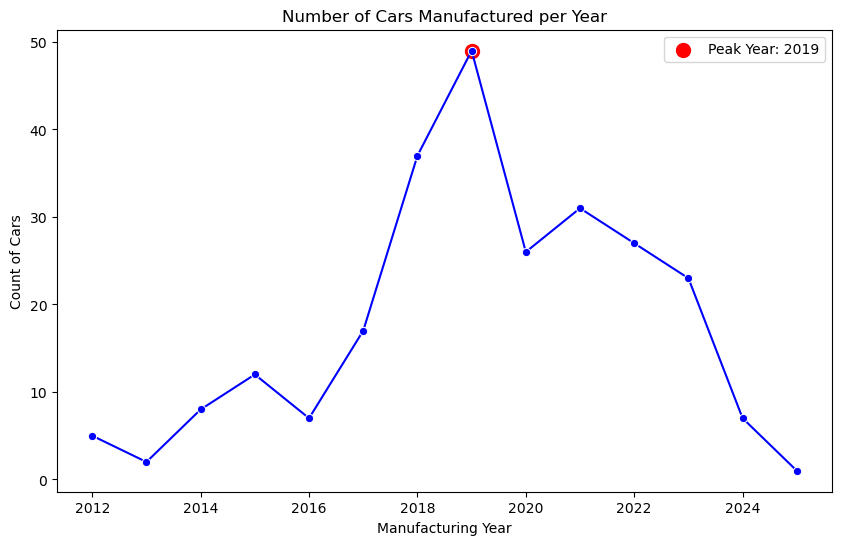

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count cars per manufacturing year
year_counts = df['manufacturing_year'].value_counts().sort_index()

# Find the peak year
peak_year = year_counts.idxmax()
peak_value = year_counts.max()

# Line plot
plt.figure(figsize=(10,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='blue')
plt.title("Number of Cars Manufactured per Year")
plt.xlabel("Manufacturing Year")
plt.ylabel("Count of Cars")

# Highlight the peak year
plt.scatter(peak_year, peak_value, color='red', s=100, label=f"Peak Year: {peak_year}")
plt.legend()
plt.show()


In [33]:
# Remove '%' and convert to integer
df['discount_percent'] = df['discount_percent'].str.replace('%', '').astype(int)


In [34]:
df

,car_name,km_travelled,Fuel_type,Vehicle_type,Registration_Location,original_price,discounted_final_price,selling_Location,manufacturing_year,city,discount_percent,km_bin
1,Mahindra Thar,37970,Petrol,Auto,GJ-03,980000,430000,"M3M Urbana, Golf Course Ext.",2021,Gurugram,56,30001-40000
2,Hyundai Grand i10,37700,Petrol,Manual,GJ-03,328000,360000,Karnavati Club,2015,Ahmedabad,-9,30001-40000
3,Renault Kwid,25000,Petrol,Manual,GJ-27,1061000,969999,Naroda,2019,Ahmedabad,8,20001-30000
4,Hyundai Grand i10,69690,Petrol,Manual,GJ-27,680000,366000,Karnavati Club,2017,Ahmedabad,46,60001-70000
5,Maruti Wagon R 1.0,79740,Petrol,Manual,GJ-12,505999,243000,Karnavati Club,2018,Ahmedabad,51,70001-80000
...,...,...,...,...,...,...,...,...,...,...,...,...
263,Tata Zest,61660,Petrol,Manual,MH-09,608000,202999,Tathawade,2016,Pune,66,60001-70000
264,Tata Zest,61920,Petrol,Manual,MH-14,706000,451000,Tathawade,2014,Pune,36,60001-70000
265,Maruti Baleno,13520,Petrol,Manual,MH-12,254000,342000,Tathawade,2024,Pune,-34,10001-20000
266,Mahindra XEV 9e,9790,Electric,Auto,MH-12,223000,288000,Tathawade,2025,Pune,-29,1000-10000


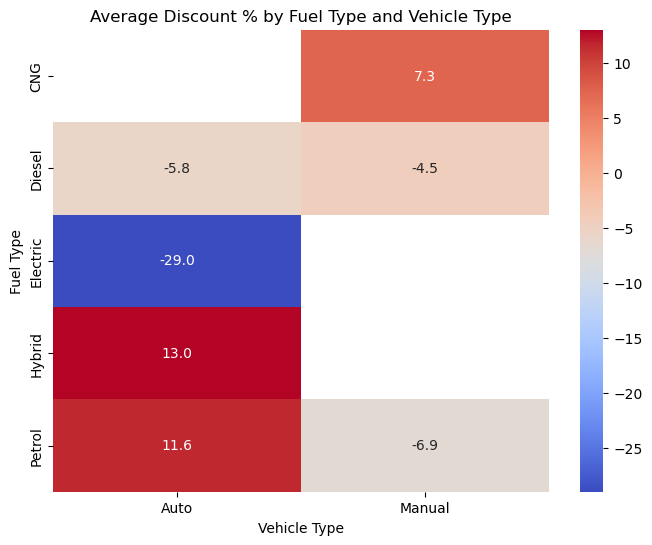

In [36]:
# Create pivot table
pivot_table = df.pivot_table(values='discount_percent', index='Fuel_type', columns='Vehicle_type', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Average Discount % by Fuel Type and Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Fuel Type")
plt.show()

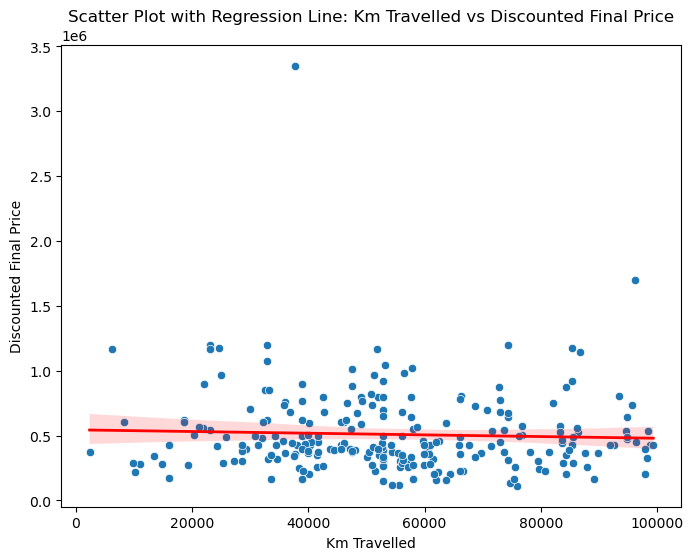

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Scatter plot
sns.scatterplot(x='km_travelled', y='discounted_final_price', data=df)

# Regression line
sns.regplot(x='km_travelled', y='discounted_final_price', data=df,
            scatter=False, color='red', line_kws={"lw":2})

plt.title("Scatter Plot with Regression Line: Km Travelled vs Discounted Final Price")
plt.xlabel("Km Travelled")
plt.ylabel("Discounted Final Price")
plt.show()


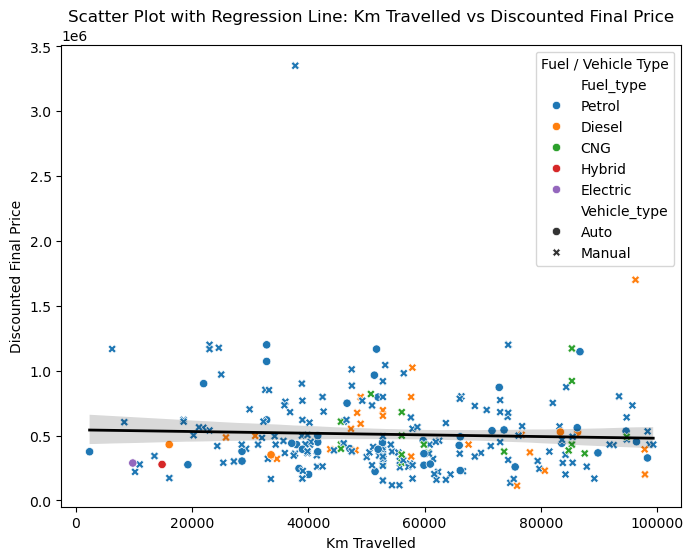

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Scatter plot with hue and style
sns.scatterplot(x='km_travelled', y='discounted_final_price', 
                data=df, hue='Fuel_type', style='Vehicle_type')

# Regression line (overall trend)
sns.regplot(x='km_travelled', y='discounted_final_price', 
            data=df, scatter=False, color='black', line_kws={"lw":2})

plt.title("Scatter Plot with Regression Line: Km Travelled vs Discounted Final Price")
plt.xlabel("Km Travelled")
plt.ylabel("Discounted Final Price")
plt.legend(title="Fuel / Vehicle Type")
plt.show()


In [42]:
# Sort by original_price (or discounted_final_price if you prefer)
top5 = df.sort_values(by='discounted_final_price', ascending=False).head(5)

# Display selected columns
print(top5[['car_name', 'original_price', 'discounted_final_price', 
            'Fuel_type', 'Vehicle_type','km_travelled']])

# If you want ALL columns for those top 5 cars
top5


               car_name  original_price  discounted_final_price Fuel_type  \
238        Renault Kwid          378000                 3350000    Petrol   
262          Honda City         1127000                 1700000    Diesel   
60   Maruti New Wagon-R          372000                 1199000    Petrol   
44   Maruti New Wagon-R          272000                 1199000    Petrol   
211       Maruti Baleno          492000                 1199000    Petrol   

    Vehicle_type  km_travelled  
238       Manual         37740  
262       Manual         96270  
60        Manual         74370  
44        Manual         74370  
211       Manual         22990  


,car_name,km_travelled,Fuel_type,Vehicle_type,Registration_Location,original_price,discounted_final_price,selling_Location,manufacturing_year,city,discount_percent,km_bin
238,Renault Kwid,37740,Petrol,Manual,UP-37,378000,3350000,Sector-18,2020,Noida,-786,30001-40000
262,Honda City,96270,Diesel,Manual,MH-01,1127000,1700000,"CARS24 ELITE Hub, Magarpatta",2014,Mundhwa,-50,90001-100000
60,Maruti New Wagon-R,74370,Petrol,Manual,HR-26,372000,1199000,"M3M Urbana, Golf Course Ext.",2019,Gurugram,-222,70001-80000
44,Maruti New Wagon-R,74370,Petrol,Manual,HR-26,272000,1199000,"M3M Urbana, Golf Course Ext.",2019,Gurugram,-340,70001-80000
211,Maruti Baleno,22990,Petrol,Manual,UP-14,492000,1199000,"M3M Urbana, Golf Course Ext.",2024,Gurugram,-143,20001-30000


In [43]:
# Sort by discounted_final_price
top5 = df.sort_values(by='discounted_final_price', ascending=False).head(5)

# Show selected columns in tabular form
top5_table = top5[['car_name', 'original_price', 'discounted_final_price', 
                   'Fuel_type', 'Vehicle_type', 'km_travelled']]

# Display as table
print(top5_table.to_string(index=False))


          car_name  original_price  discounted_final_price Fuel_type Vehicle_type  km_travelled
      Renault Kwid          378000                 3350000    Petrol       Manual         37740
        Honda City         1127000                 1700000    Diesel       Manual         96270
Maruti New Wagon-R          372000                 1199000    Petrol       Manual         74370
Maruti New Wagon-R          272000                 1199000    Petrol       Manual         74370
     Maruti Baleno          492000                 1199000    Petrol       Manual         22990


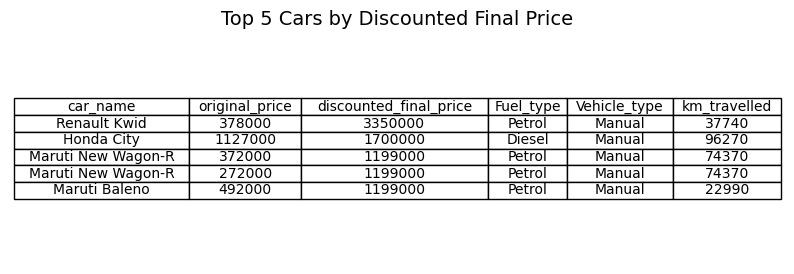

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort by discounted_final_price and select top 5
top5 = df.sort_values(by='discounted_final_price', ascending=False).head(5)

# Select relevant columns
top5_table = top5[['car_name', 'original_price', 'discounted_final_price', 
                   'Fuel_type', 'Vehicle_type', 'km_travelled']]

# Create a figure
fig, ax = plt.subplots(figsize=(10,3))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=top5_table.values,
                 colLabels=top5_table.columns,
                 cellLoc='center',
                 loc='center')

# Style table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(top5_table.columns))))

plt.title("Top 5 Cars by Discounted Final Price", fontsize=14)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_22148\214065609.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='car_name', y='count', data=top5_df, palette="magma")


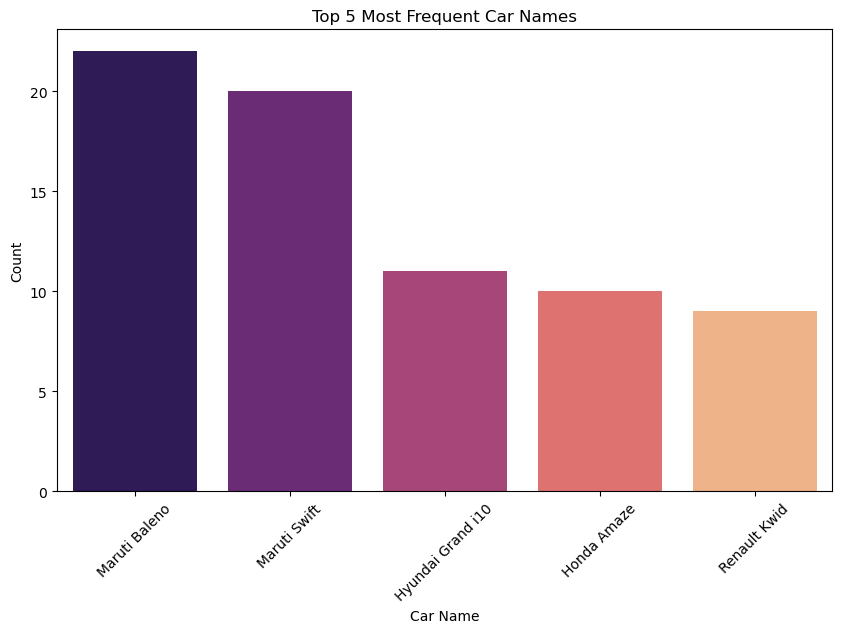

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 most frequent car names
top5_counts = df['car_name'].value_counts().head(5)

# Convert to DataFrame for plotting
top5_df = top5_counts.reset_index()
top5_df.columns = ['car_name', 'count']

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='car_name', y='count', data=top5_df, palette="magma")

plt.title("Top 5 Most Frequent Car Names")
plt.xlabel("Car Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [55]:
df

,car_name,km_travelled,Fuel_type,Vehicle_type,Registration_Location,original_price,discounted_final_price,selling_Location,manufacturing_year,city,discount_percent,km_bin
1,Mahindra Thar,37970,Petrol,Auto,GJ-03,980000,430000,"M3M Urbana, Golf Course Ext.",2021,Gurugram,56,30001-40000
2,Hyundai Grand i10,37700,Petrol,Manual,GJ-03,328000,360000,Karnavati Club,2015,Ahmedabad,-9,30001-40000
3,Renault Kwid,25000,Petrol,Manual,GJ-27,1061000,969999,Naroda,2019,Ahmedabad,8,20001-30000
4,Hyundai Grand i10,69690,Petrol,Manual,GJ-27,680000,366000,Karnavati Club,2017,Ahmedabad,46,60001-70000
5,Maruti Wagon R 1.0,79740,Petrol,Manual,GJ-12,505999,243000,Karnavati Club,2018,Ahmedabad,51,70001-80000
...,...,...,...,...,...,...,...,...,...,...,...,...
263,Tata Zest,61660,Petrol,Manual,MH-09,608000,202999,Tathawade,2016,Pune,66,60001-70000
264,Tata Zest,61920,Petrol,Manual,MH-14,706000,451000,Tathawade,2014,Pune,36,60001-70000
265,Maruti Baleno,13520,Petrol,Manual,MH-12,254000,342000,Tathawade,2024,Pune,-34,10001-20000
266,Mahindra XEV 9e,9790,Electric,Auto,MH-12,223000,288000,Tathawade,2025,Pune,-29,1000-10000
